In [50]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
#nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC, SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

## **TABLE OF CONTENT**



1.   LOAD DATA
2.   EXPLORATORY DATA ANALYSIS
3.   MODELING
4.   EVALUATE MODELS
5.   RESAMPLE DATASET
6.   CONCLUSION



## **LOAD DATA**

In [62]:
train = pd.read_csv('Train.csv')
train.head()

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


## **EXPLORATORY DATA ANALYSIS**

In [47]:
def drawbarplot(x,y,xlabel,title,figsize=(10,10)):
    plt.figure(figsize=figsize)    
    sns.barplot(x=x,y=y,palette = 'Blues',orient='h',order=y)
    for i,v in enumerate(x):
        plt.text(0.8,i,v,color='k',fontsize=10)
    
    plt.title(title,fontsize=20)
    plt.xlabel(xlabel,fontsize =14)
    plt.show()

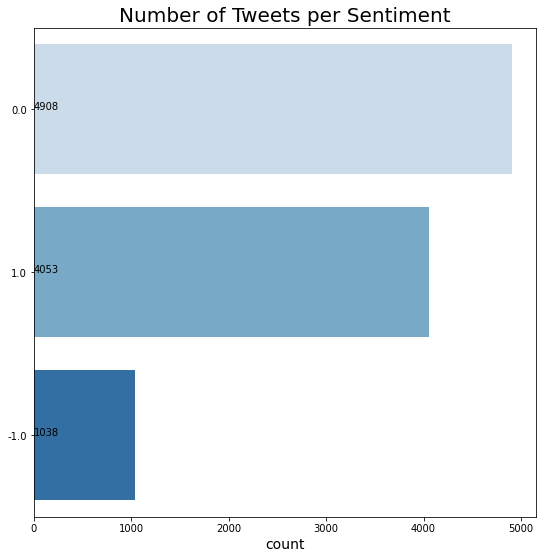

In [51]:
count =  train['label'].value_counts()
drawbarplot(x=count.values,y=count.index,xlabel='count',title='Number of Tweets per Sentiment',figsize=(9,9))

In [52]:
df_0 = train[train['label'] == 0.0]
df_1 = train[train['label'] == 1.0]
df_neg = train[train['label'] == -1.0]

In [58]:
df_0.head()

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,me amp the big homie meanboy3000 meanboy mb mb...,0.0,1.000000
4,J77ENIIE,thanks to catch me performing at la nuit nyc ...,0.0,1.000000
10,PEM9KSVV,this point i have 2 text butwbon jovi cover ...,0.0,1.000000
11,TTLQWD2R,my prediction vaccine exemption in arizona wil...,0.0,0.666667
13,9SCBVTZP,1mug noche mmr mixmasterrod dcdj mmr mad h...,0.0,1.000000


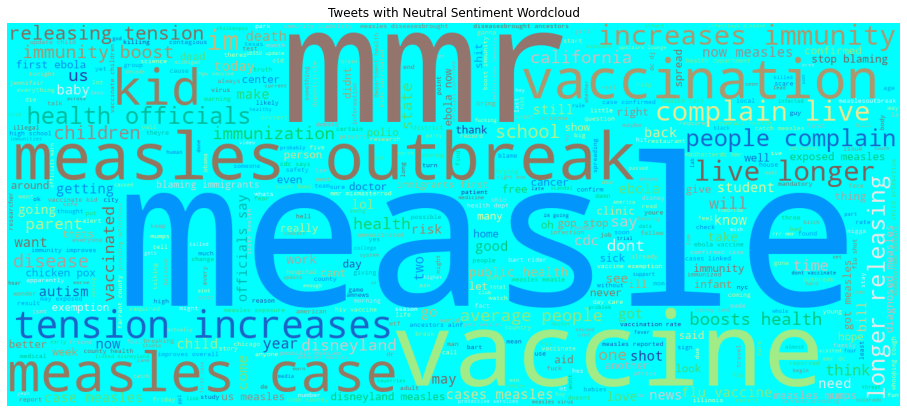

In [59]:
st_words = set(STOPWORDS)
st_words.update(['https','CO','RT','Please','via','amp','place','new','ttot','best','great','top','ht','ysecrettravel','ysecrettravel_'])
wc = WordCloud(height=600,repeat=False,width=1400,max_words=500,stopwords=st_words,colormap='terrain',background_color='Cyan',mode='RGBA').generate(' '.join(df_0['safe_text'].dropna().astype(str)))
plt.figure(figsize = (16,16))
plt.imshow(wc)
plt.title('Tweets with Neutral Sentiment Wordcloud')
plt.axis('off')
plt.show()

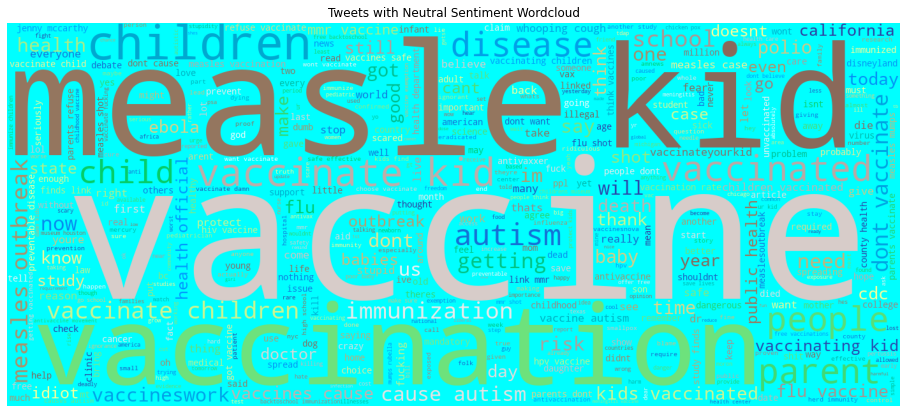

In [60]:
st_words = set(STOPWORDS)
st_words.update(['https','CO','RT','Please','via','amp','place','new','ttot','best','great','top','ht','ysecrettravel','ysecrettravel_'])
wc = WordCloud(height=600,repeat=False,width=1400,max_words=500,stopwords=st_words,colormap='terrain',background_color='Cyan',mode='RGBA').generate(' '.join(df_1['safe_text'].dropna().astype(str)))
plt.figure(figsize = (16,16))
plt.imshow(wc)
plt.title('Tweets with Pro-vacinne Sentiment Wordcloud')
plt.axis('off')
plt.show()

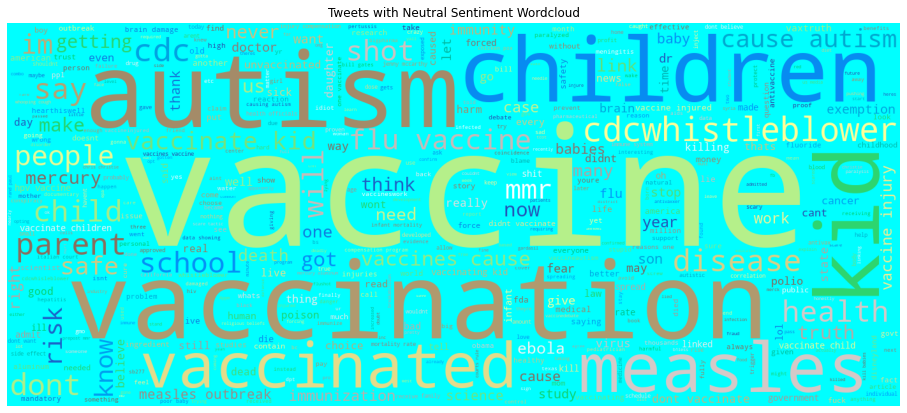

In [61]:
st_words = set(STOPWORDS)
st_words.update(['https','CO','RT','Please','via','amp','place','new','ttot','best','great','top','ht','ysecrettravel','ysecrettravel_'])
wc = WordCloud(height=600,repeat=False,width=1400,max_words=500,stopwords=st_words,colormap='terrain',background_color='Cyan',mode='RGBA').generate(' '.join(df_neg['safe_text'].dropna().astype(str)))
plt.figure(figsize = (16,16))
plt.imshow(wc)
plt.title('Tweets with Anti_vacinne Sentiment Wordcloud')
plt.axis('off')
plt.show()

## **MODELLING**

In [65]:
# CLEANING THE TRAINING SET

wordnet_lemmatizer = WordNetLemmatizer()

i = 0
for tweet in train['safe_text']:
    tweet = tweet.lower()
    tweet = re.sub(r'url', '', tweet)
    tweet = re.sub(r'<user>', '', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    train.loc[i, 'safe_text'] = tweet
    tweet = nltk.word_tokenize(tweet)
    i += 1

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [66]:
train.isnull().sum()

tweet_id     0
safe_text    0
label        1
agreement    2
dtype: int64

In [86]:
# DROPPING ROWS WITH NULL VALUES

train.dropna(inplace = True)

In [87]:
train.isnull().sum()

tweet_id     0
safe_text    0
label        0
agreement    0
dtype: int64

In [69]:
# EXTRACTING FEATURES AND LABELS FROM DATASET

X = train['safe_text']
y = train['label']

In [70]:
# FEATURE EXTRACTION USING TfidfVectorizer

tf_vect = TfidfVectorizer()
X = tf_vect.fit_transform(X)

In [71]:
# FIT LINEAR SUPPORT VECTOR MODEL WITH TRAINING SET 

linear_sv = LinearSVC()
model = linear_sv.fit(X, y)

In [72]:
# FIT NON-LINEAR SUPPORT VECTOR MODEL WITH TRAINING SET

rbf_svc = SVC(kernel='rbf')
rbf_model = rbf_svc.fit(X,y)

## **EVALUATE MODELS**

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
linear_sv2 = LinearSVC()
model2 = linear_sv2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
accuracy_score(y_test, y_pred)

0.722

In [95]:
confusion_matrix(y_test, y_pred)

array([[803,  12,  24],
       [ 58, 759, 148],
       [ 76, 182, 541]])

In [45]:
rbf_svc2 = SVC(kernel='rbf')
rbf_model2 = rbf_svc.fit(X,y)
y_pred = model2.predict(X_test)
accuracy_score(y_test, y_pred)

0.722

## **RESAMPLING DATASET**

In [81]:
# RESAMPLING THE DATASET

from sklearn.utils import resample

# Upsample minority
train_upsampled = resample(df_neg,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=len(df_1['label']), # match number in minority class
                          random_state=27) # reproducible results


In [82]:
train_upsampled['label'].value_counts()

-1.0    4053
Name: label, dtype: int64

In [83]:
# Combine downsampled majority class with minority class
upsampled = pd.concat([train_upsampled, df_1])
upsampled = pd.concat([upsampled, df_0])

# Check new class counts
upsampled['label'].value_counts()

 0.0    4908
 1.0    4053
-1.0    4053
Name: label, dtype: int64

In [84]:
# CLEANING THE TRAINING SET

wordnet_lemmatizer = WordNetLemmatizer()

i = 0
for tweet in upsampled['safe_text']:
    tweet = tweet.lower()
    tweet = re.sub(r'url', '', tweet)
    tweet = re.sub(r'<user>', '', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    train.loc[i, 'safe_text'] = tweet
    tweet = nltk.word_tokenize(tweet)
    i += 1

In [88]:
upsampled.isnull().sum()

tweet_id     0
safe_text    0
label        0
agreement    0
dtype: int64

In [89]:
X_2 = upsampled['safe_text']
y_2 = upsampled['label']

In [90]:
tf_vect = TfidfVectorizer()
X_2 = tf_vect.fit_transform(X_2)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

In [93]:
linear_sv3 = LinearSVC()
model3 = linear_sv3.fit(X_train,y_train)
y_pred = model3.predict(X_test)
accuracy_score(y_test, y_pred)

0.8079139454475605

In [96]:
confusion_matrix(y_test, y_pred)

array([[803,  12,  24],
       [ 58, 759, 148],
       [ 76, 182, 541]])

In [94]:
rbf_svc3 = SVC(kernel='rbf')
rbf_model3 = rbf_svc.fit(X,y)
y_pred = model3.predict(X_test)
accuracy_score(y_test, y_pred)

0.8079139454475605

## **CONCLUSION**

Upon performing exploratory data analysis, it is clear that the number of negative sentiment tweets are significantly lower than the number of positive sentiment tweet. This difference can result in the machine learning model predicting pro-vacinne tweets more accurately than anti-vacinne tweets. Before any sort of resampling or altering of the dataset was performed, the original dataset was used to fit the support vector machines, producing an accuracy score of 0.72. This score isn't too bad, but because of the clear distortion in the number of pro-vacinne and anti-vacinne tweets, resampling the dataset seemed like a good solution to improving the predictive accuracy the support vector machine.
The upsampling method was used, i.e. the number of anti-vacinne tweets were increased to that of the number of pro-vacinne tweets. The resampled dataset was then used to fit the support vector machines, producing an accuracy score of 0.81, which is significantly higher than 0.72. In conclusion, the method of resampling proved to be a success. 